In [ ]:
!pip install git+https://github.com/mementum/backtrader.git@0fa63ef4a35dc53cc7320813f8b15480c8f85517#egg=backtrader


In [2]:
import backtrader as bt

In [59]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]

In [60]:
import yfinance as yf
import mplfinance as mpf


btc = yf.Ticker("BTC-USD")
hist = btc.history(period="max", interval="1d")

In [67]:
class BuyAndHold_More_Fund(bt.Strategy):
    params = dict(
        monthly_cash=1000.0,
        start_cash=1000.0
    )

    def start(self):
        # Activate the fund mode and set the default value at 100
        self.broker.set_fundmode(fundmode=True, fundstartval=self.params.start_cash)

        self.cash_start = self.broker.get_cash()

        # Add a timer which will be called on the 1st trading day of the month
        self.add_timer(
            bt.timer.SESSION_START,
            monthdays=[1],  # called on the 1st day of the month
            monthcarry=True,  # called on the 2nd day if the 1st is holiday
        )

    def notify_timer(self, timer, when, *args, **kwargs):
        # Add the influx of monthly cash to the broker
        self.broker.add_cash(self.params.monthly_cash)
        
        print(f"Broker Value {self.broker.get_value()}")
        print(f"Amount to Add {self.params.monthly_cash}")

        # buy available cash
        print(self.broker.get_value())
        target_value = self.broker.get_value() + self.params.monthly_cash
        self.order_target_value(target=target_value)
        print(f"Target Value {target_value}")
        self.buy()

    def stop(self):
        # calculate the actual returns
        self.roi = (self.broker.get_value() / self.cash_start) - 1.0
        self.froi = self.broker.get_fundvalue() - self.params.start_cash
        print('ROI:        {:.2f}%'.format(100.0 * self.roi))
        print('Fund Value: {:.2f}%'.format(self.froi))

Broker Value 10000.0
Amount to Add 1000.0
10000.0
Target Value 11000.0
Broker Value 9242.1201171875
Amount to Add 1000.0
9242.1201171875
Target Value 10242.1201171875
Broker Value 8736.858154296875
Amount to Add 1000.0
8736.858154296875
Target Value 9736.858154296875
Broker Value 11287.26416015625
Amount to Add 1000.0
11287.26416015625
Target Value 12287.26416015625
Broker Value 10207.377075195312
Amount to Add 1000.0
10207.377075195312
Target Value 11207.377075195312
Broker Value 8153.1922760009775
Amount to Add 1000.0
8153.1922760009775
Target Value 9153.192276000977
Broker Value 10484.797119140625
Amount to Add 1000.0
10484.797119140625
Target Value 11484.797119140625
Broker Value 10915.257446289062
Amount to Add 1000.0
10915.257446289062
Target Value 11915.257446289062
Broker Value 11186.725036621094
Amount to Add 1000.0
11186.725036621094
Target Value 12186.725036621094
Broker Value 11709.721008300781
Amount to Add 1000.0
11709.721008300781
Target Value 12709.721008300781
Broker V

<IPython.core.display.Javascript object>


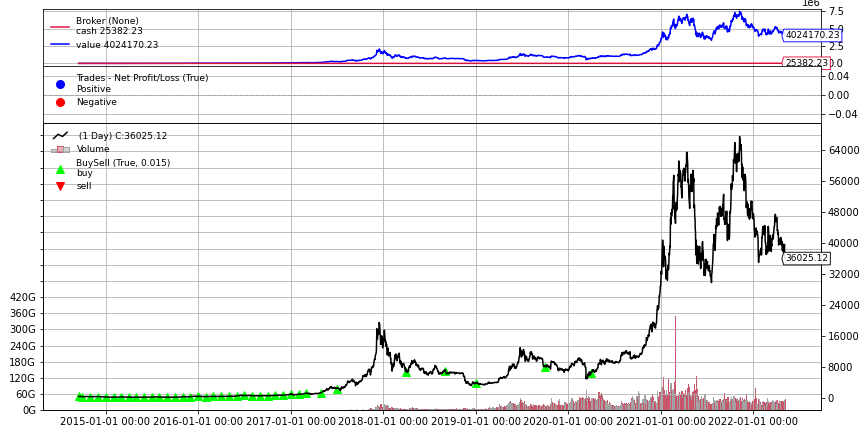

In [68]:
import datetime
cerebro = bt.Cerebro()
data = bt.feeds.PandasData(
    dataname=hist
)
cerebro.adddata(data)
cerebro.addstrategy(BuyAndHold_More_Fund)
cerebro.run()

# cerebro = bt.Cerebro()
# data = bt.feeds.PandasData(
#     dataname=hist
# )
# cerebro.adddata(data)
# cerebro.addstrategy(BuyAndHoldDollarCost)
# cerebro.run()
# figs = cerebro.plot()


In [21]:
def saveplots(cerebro, numfigs=1, iplot=True, start=None, end=None,
             width=16, height=9, dpi=300, tight=True, use=None, file_path = '', **kwargs):

        from backtrader import plot
        if cerebro.p.oldsync:
            plotter = plot.Plot_OldSync(**kwargs)
        else:
            plotter = plot.Plot(**kwargs)

        figs = []
        for stratlist in cerebro.runstrats:
            for si, strat in enumerate(stratlist):
                rfig = plotter.plot(strat, figid=si * 100,
                                    numfigs=numfigs, iplot=iplot,
                                    start=start, end=end, use=use)
                figs.append(rfig)

        for fig in figs:
            for f in fig:
                f.savefig(file_path, bbox_inches='tight')
        return figs

saveplots(cerebro, file_path = 'savefig.png') #run it

[[<Figure size 432x288 with 4 Axes>]]